In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
data = pd.read_csv('C:/Users/asus/Desktop/Prostate_Cancer.csv')
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [9]:
print(data.shape)  

(100, 10)


In [10]:
data.describe() 

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


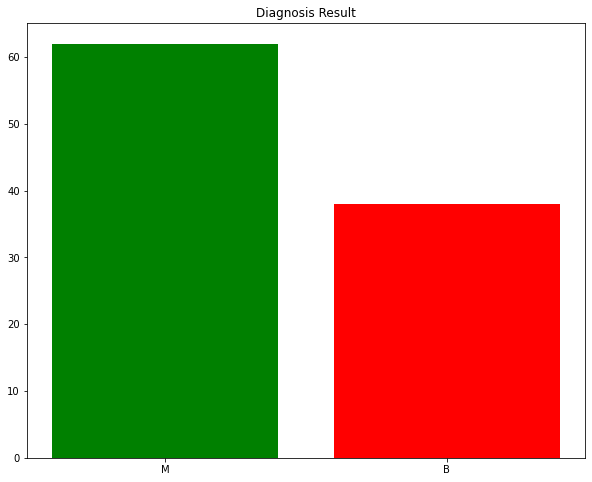

M    62
B    38
Name: diagnosis_result, dtype: int64


In [11]:
plt.figure(figsize=(10,8))   
plt.bar(list(data['diagnosis_result'].value_counts().index), data['diagnosis_result'].value_counts(), color = ['g','r'])
plt.title('Diagnosis Result')
plt.show()  
print(data['diagnosis_result'].value_counts())

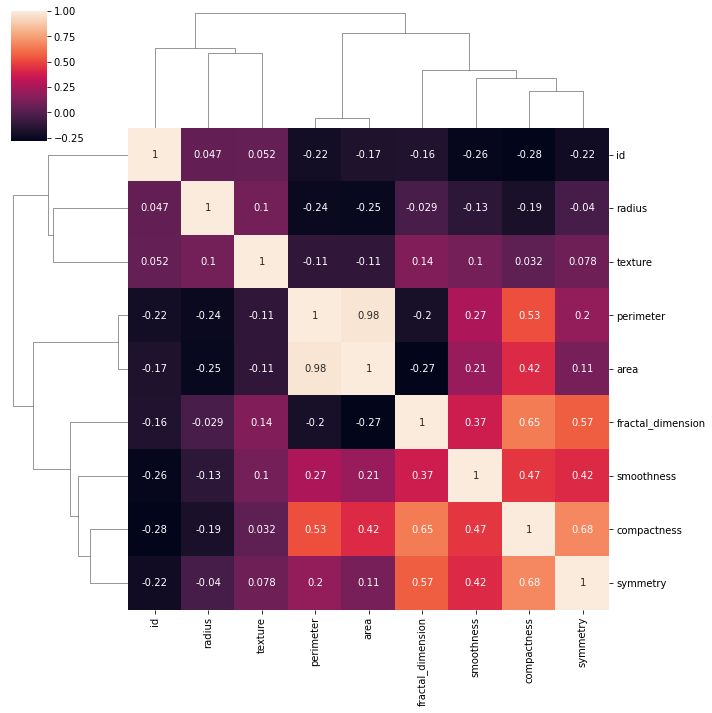

In [12]:
sns.clustermap(data.corr(),annot=True)

In [13]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


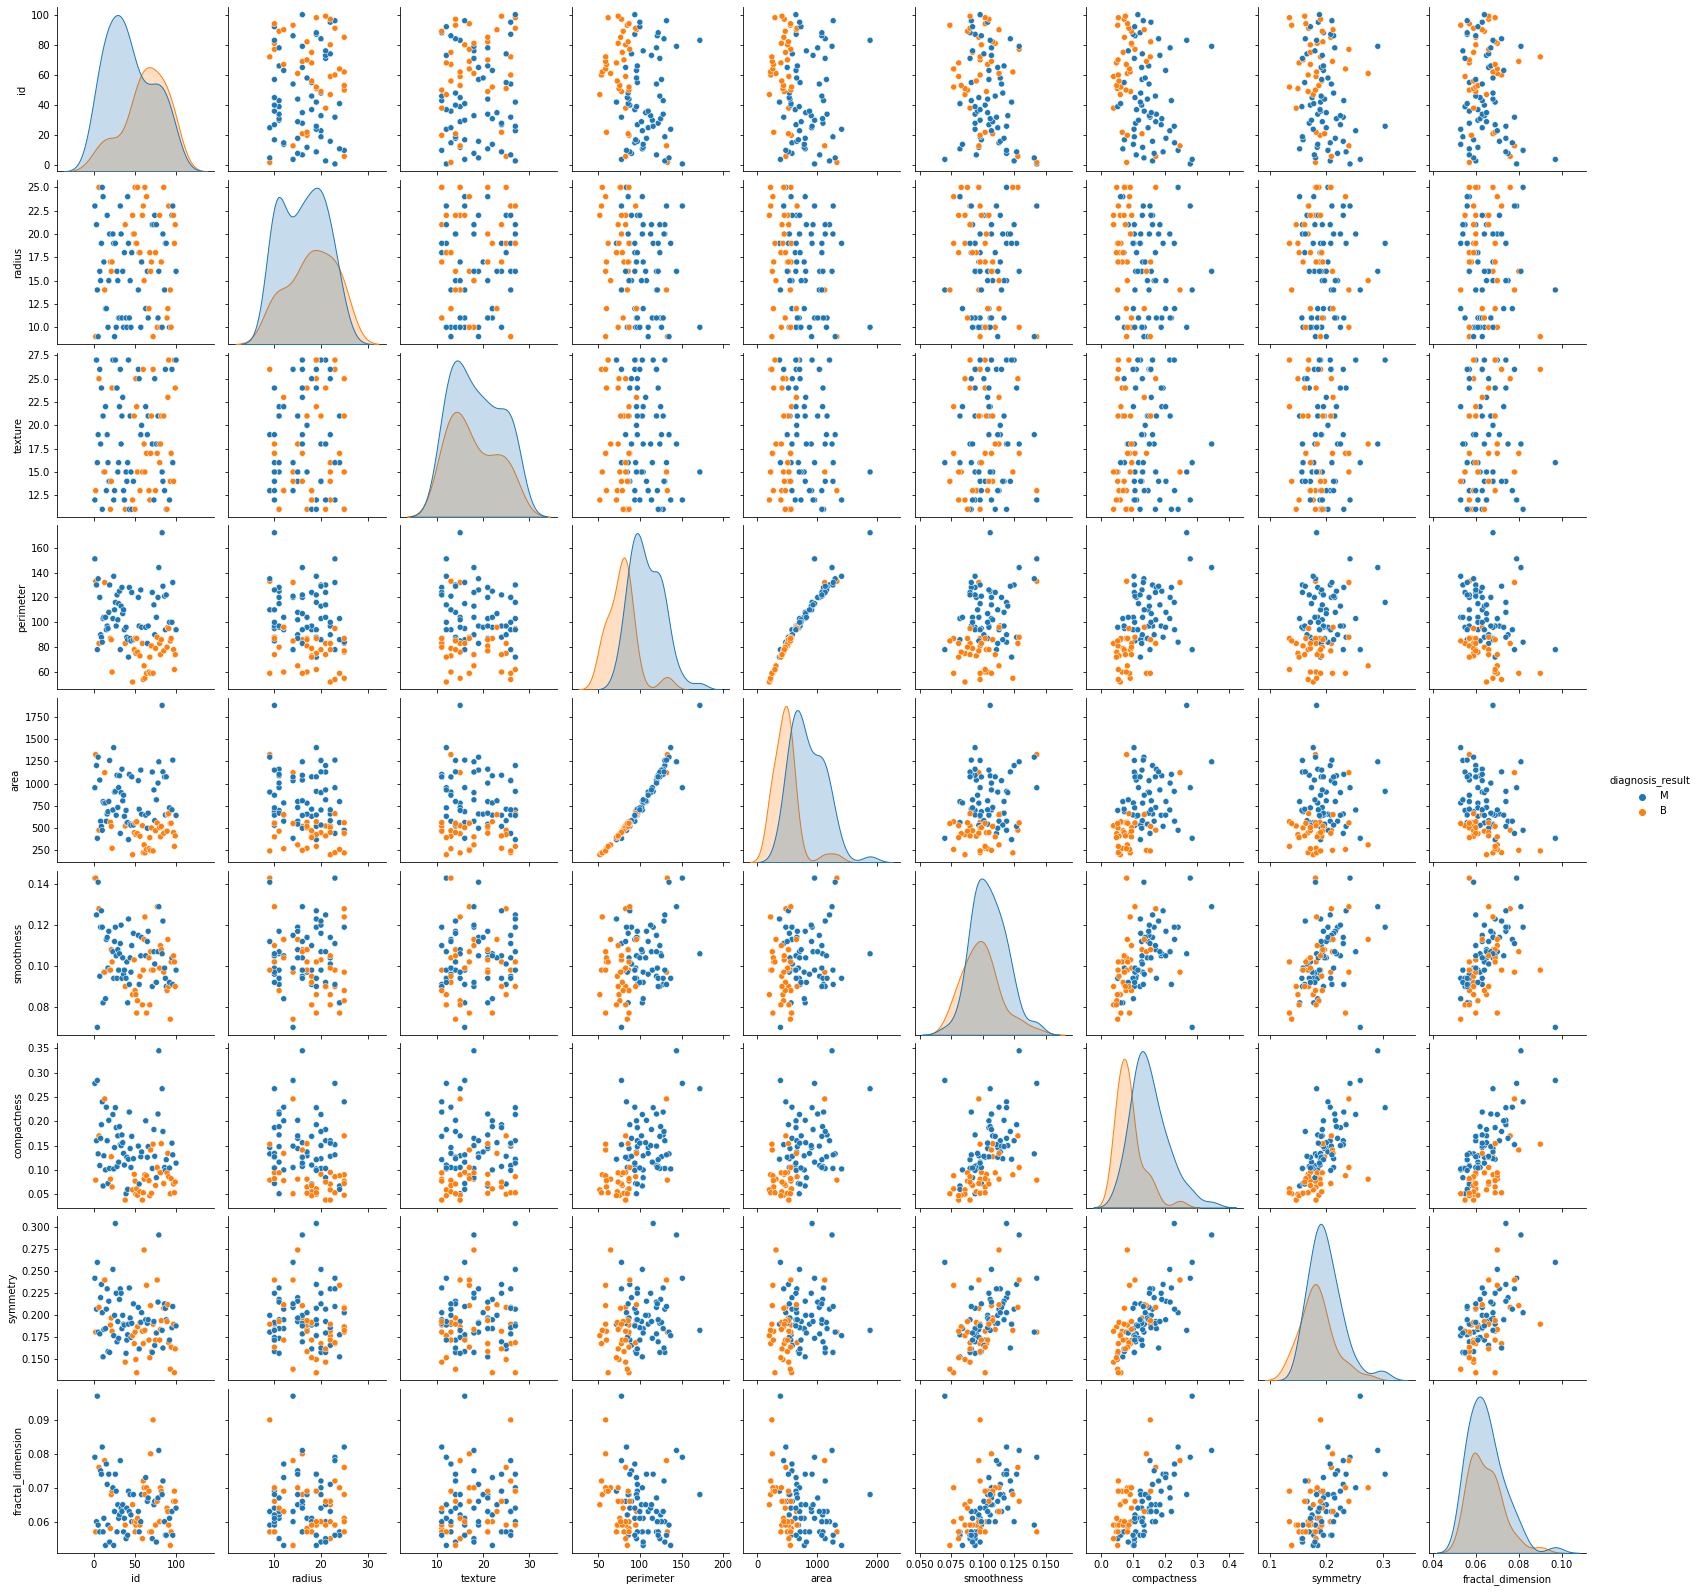

In [14]:
sns.pairplot(data, hue = 'diagnosis_result') 

In [15]:
target_dict = {'M': 1, 'B':0}
data['diagnosis_result'] = data['diagnosis_result'].map(target_dict)
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [16]:
data['id'].nunique()

100

In [17]:
data = data.drop('id', axis=1)
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,23,12,151,954,0.143,0.278,0.242,0.079
1,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,1,14,16,78,386,0.070,0.284,0.260,0.097
4,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [18]:
y = data['diagnosis_result']
X = data.drop('diagnosis_result',axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [20]:
print('X_train Shape : {} | y_train Shape : {}'.format(X_train.shape, y_train.shape))
print('X_test  Shape : {} | y_test  Shape : {}'.format(X_test.shape, y_test.shape))

X_train Shape : (80, 8) | y_train Shape : (80,)
X_test  Shape : (20, 8) | y_test  Shape : (20,)


In [21]:
scaler = MinMaxScaler()  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
pd.DataFrame(X_train, columns= data.columns[:-1]).head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry
0,0.5625,0.1250,0.175000,0.123508,0.342466,0.055375,0.337278,0.136364
1,0.1250,0.0000,0.233333,0.157518,0.246575,0.182410,0.343195,0.250000
2,0.0625,0.8125,0.375000,0.264320,0.479452,0.485342,0.532544,0.363636
3,0.1250,0.0000,0.633333,0.538186,0.287671,0.589577,0.568047,0.227273
4,0.5000,0.6250,0.241667,0.179594,0.383562,0.045603,0.142012,0.090909


In [23]:
pd.DataFrame(X_test, columns= data.columns[:-1]).head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry
0,0.6875,0.1875,0.641667,0.554893,0.712329,0.459283,0.165680,0.431818
1,0.3125,0.9375,0.566667,0.495823,0.616438,0.361564,0.437870,0.227273
2,0.7500,0.4375,0.600000,0.553699,0.273973,0.211726,0.136095,0.045455
3,0.5625,0.0000,0.600000,0.521480,0.547945,0.426710,0.331361,0.159091
4,0.0625,0.2500,0.275000,0.196897,0.369863,0.218241,0.236686,0.204545


In [31]:

import pandas as pd
import mglearn
import numpy as np

from sklearn.model_selection import train_test_split
cancer = pd.read_csv('C:/Users/asus/Desktop/Prostate_Cancer.csv');

area=cancer.drop(['id','diagnosis_result'],axis=1)
data=cancer['diagnosis_result']

X_train, X_test, y_train, y_test = train_test_split(area,data,random_state=1)

In [32]:
print("X_train shape:",X_train.shape)
print("Y_train shape:",y_train.shape)

X_train shape: (75, 8)
Y_train shape: (75,)


In [33]:
print("X_test shape",X_test.shape)
print("Y_test shape",y_test.shape)

X_test shape (25, 8)
Y_test shape (25,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
X_new=np.array([[23,12,151,954,0.143,0.278,0.242,0.079]])
print("X_new.shape:",X_new.shape)

X_new.shape: (1, 8)


In [36]:
prediction=knn.predict(X_new)
print("Prediction:",prediction)

Prediction: ['M']


In [37]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n",y_pred)

Test set predictions:
 ['B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'M' 'M']


In [38]:
print("Test set score:{:.2f}".format(np.mean(y_pred==y_test)))

Test set score:0.76


In [39]:
print("Test set score:{:.2f}".format(knn.score(X_test,y_test)))

Test set score:0.76
